# Demo IBIxTMS_2F (ionospheric bubble index)

> Authors: Ashley Smith

> Abstract: Access to the ionospheric bubble index (level 2 product).

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

2020-03-12T14:47:23+00:00

CPython 3.7.6
IPython 7.11.1

viresclient 0.6.0
pandas 0.25.3
xarray 0.15.0
matplotlib 3.1.2


In [2]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np

request = SwarmRequest()

## IBIxTMS_2F product information

Ionospheric bubble index at 1Hz

Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-2-product-definitions#IBIxTMS_2F

### Check what "IBI" data variables are available

In [3]:
request.available_collections("IBI", details=False)

{'IBI': ['SW_OPER_IBIATMS_2F', 'SW_OPER_IBIBTMS_2F', 'SW_OPER_IBICTMS_2F']}

In [4]:
request.available_measurements("IBI")

['Bubble_Index',
 'Bubble_Probability',
 'Flags_Bubble',
 'Flags_F',
 'Flags_B',
 'Flags_q']

## Fetch 3 minutes of IBI data

In [5]:
request = SwarmRequest()
request.set_collection("SW_OPER_IBIATMS_2F")
request.set_products(measurements=request.available_measurements("IBI"))
data = request.get_between(
    dt.datetime(2016,1,1,9,7),
    dt.datetime(2016,1,1,9,10)
)

[1/1] Processing:  100%|███████████████████████████████████████████████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|█████████████████████████████████████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.096MB)


In [6]:
data.sources

['SW_OPER_IBIATMS_2F_20160101T000000_20160101T235959_0301']

In [7]:
df = data.as_dataframe()
df.head()

,Radius,Flags_Bubble,Flags_B,Latitude,Bubble_Probability,Longitude,Spacecraft,Flags_q,Flags_F,Bubble_Index
Timestamp,,,,,,,,,,
2016-01-01 09:07:00,6830079.62,0,0,-16.923659,0.0,-52.119907,A,5,1,0
2016-01-01 09:07:01,6830087.28,0,0,-16.987667,0.0,-52.120848,A,5,1,0
2016-01-01 09:07:02,6830094.93,0,0,-17.051675,0.0,-52.121786,A,5,1,0
2016-01-01 09:07:03,6830102.57,0,0,-17.115682,0.0,-52.122722,A,5,1,0
2016-01-01 09:07:04,6830110.21,0,0,-17.179689,0.0,-52.123656,A,5,1,0


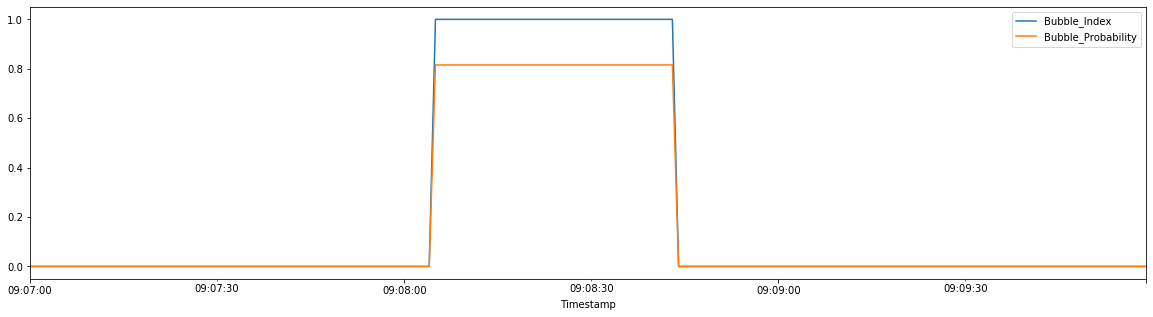

In [8]:
df.plot(y=["Bubble_Index", "Bubble_Probability"], figsize=(20,5));

In [9]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:             (Timestamp: 180)
Coordinates:
  * Timestamp           (Timestamp) datetime64[ns] 2016-01-01T09:07:00 ... 2016-01-01T09:09:59
Data variables:
    Spacecraft          (Timestamp) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    Radius              (Timestamp) float64 6.83e+06 6.83e+06 ... 6.831e+06
    Flags_Bubble        (Timestamp) uint8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    Flags_B             (Timestamp) uint8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    Latitude            (Timestamp) float64 -16.92 -16.99 ... -28.31 -28.38
    Bubble_Probability  (Timestamp) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Longitude           (Timestamp) float64 -52.12 -52.12 ... -52.24 -52.24
    Flags_q             (Timestamp) uint8 5 5 5 5 5 5 5 5 5 ... 5 5 5 5 5 5 5 5
    Flags_F             (Timestamp) uint8 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    Bubble_Index        (Timestamp) int8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
Attributes:
    Sources:         ['SW_OPER_IBIATMS_2F_20160101T000000_20160101T235959_0301']
    MagneticModels:  []
    RangeFilters:    []